In [167]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt


In [188]:

df = pd.read_excel('schedule_data.xlsx',sheet_name='SSF_1')

# Get start and end times
# df[['start','end']] = df['Event Date'].str.split(' → ',expand=True)
# df.start=pd.to_datetime(df.start)
# df.end=pd.to_datetime(df.end)
# df[['start','end']].to_clipboard(index=False)

In [190]:
import altair as alt

def gantt_chart(df):
	chart = alt.Chart(df).mark_bar().encode(
		x = alt.X('start:T',title='Time Frame',axis=alt.Axis(format='%b:%d')),
		x2='end:T',
		# y=alt.Y('Title',sort='x',title='Tags'),
		color=alt.Color('Type',legend=alt.Legend(title='Type',orient='top')),
		text='Tags',
		tooltip=['start','end'],
		order='Number',
		# column='Month',

	).properties(
		title="Schedule",
		width=600,
		height=250,
	)
	return chart

# gantt_chart(df).facet(row='Tags')

g1 = gantt_chart(df.loc[df['Tags'] == 'Sewer System Master Plan'])
g2 = gantt_chart(df.loc[df['Tags'] == 'Capacity Fee Study (Bartle Wells)'])

alt.vconcat(g1,g2)

# text = chart.mark_text(
# 	align='left',
# 	baseline='middle',
# 	dx=70,

# ).encode(text='Name')
# chart + text


# groupby=["Tags"]

alt.VConcatChart(...)

In [ ]:

# Get duration
df['duration']=df.end-df.start
df.duration=df.duration.apply(lambda x: x.days+1)

# Start and end days
p_start=df.start.min()
p_end=df.end.max()
p_duration=(p_end-p_start).days+1

# Relative date
df['rel_start']=df.start.apply(lambda x: (x-p_start).days)

#sort in ascending order of start date
df=df.sort_values(by='start', ascending=True)



#xticks
x_ticks=[i for i in range(p_duration+1)]
x_labels=[(p_start+dt.timedelta(days=i)).strftime('%d-%b') 
        for i in x_ticks]


yticks=[i for i in range(len(text_series))]



ValueError: 'Sewer System Master Plan' is neither a valid single color nor a color sequence consisting of single character color specifiers such as 'rgb'. Note also that the latter is deprecated.

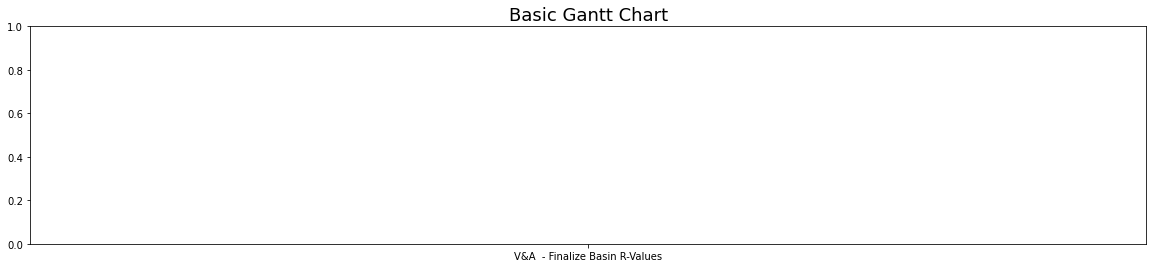

In [65]:
######  PLOTTING GANTT CHART ######
plt.figure(figsize=(20,4))
plt.title('Basic Gantt Chart', size=18)

color_series = df['Tags']
text_series = df['Title']


for i in range(df.shape[0]):

    color=color_series[i]
    plt.barh(y=yticks[i], left=df.rel_start[i], 
             width=text_series[i], alpha=0.4, 
             color=color)
    plt.barh(y=yticks[i], left=df.rel_start[i], 
             width=df.w_comp[i], alpha=1, color=color,
            label=text_series[i])
    plt.text(x=df.rel_start[i]+df.w_comp[i],
             y=yticks[i],
             s=f'{text_series[i]}%')


plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.grid(axis='x')



#fix legends
handles, labels = plt.gca().get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list, fontsize='medium', 
           title='Department', title_fontsize='large')

plt.show()


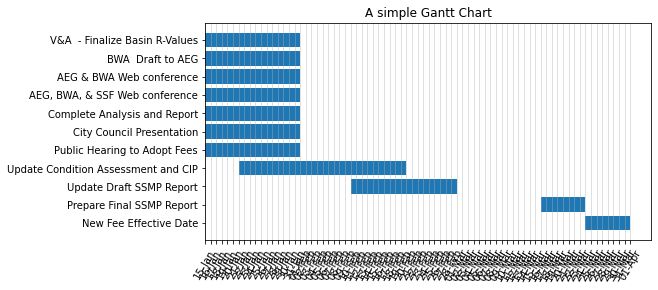

In [50]:

plt.figure(figsize=(8,4))
#plot barh chart
plt.barh(y=df['Title'], left=df.rel_start, width=df.duration)
#Invert y axis
plt.gca().invert_yaxis()
#customize x-ticks
plt.xticks(ticks=x_ticks, labels=x_labels)
#Title
plt.title('A simple Gantt Chart')
#rotate x-ticks
plt.xticks(rotation=60)
#add grid lines
plt.grid(axis='x', alpha=0.5)
#save fig
# plt.savefig('simple_gantt.png')
plt.show()